In [1]:
#First of download all the needed libraries for the project

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
#Retrieve an image from a given path
img=image.load_img("C:/Users/XPS/Desktop/Breast Cancer/data/training/Normal/mdb003.pgm")

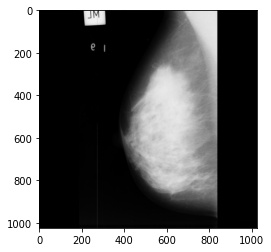

In [3]:
#Show the image using plt
plt.imshow(img)

In [4]:
#Images are 1024 pixels*1024 pixels
cv2.imread("C:/Users/XPS/Desktop/Breast Cancer/data/training/Normal/mdb003.pgm").shape

(1024, 1024, 3)

In [5]:
#Use ImageDataGenerator in order to load data and transform it to a form used by the model
train_dataset=ImageDataGenerator(rescale=1/255).flow_from_directory('BreastData/data/training/',
                                                                    target_size=(400,400),
                                                                    batch_size=5,
                                                                    class_mode="categorical",
                                                                    interpolation="lanczos")

validation_dataset=ImageDataGenerator(rescale=1/255).flow_from_directory('BreastData/data/validation/',
                                                                        target_size=(400,400),
                                                                        batch_size=5,
                                                                        class_mode="categorical",
                                                                        interpolation="lanczos")

Found 90 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [14]:
#Nb of classes 
#Nb of samples

print(train_dataset)
print(train_dataset.class_indices)
print(train_dataset.samples)

{'Begnin': 0, 'Malignant': 1, 'Normal': 2}
90


In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(400,400,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    ##
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512,activation="relu"),
    ##
    tf.keras.layers.Dense(3,activation="softmax")
                          
])

In [17]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
#from sklearn.model_selection import cross_val_score
#print(cross_val_score(model,train_dataset,))

In [20]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=5,
                   epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 4s 931ms/step - loss: 1.0879 - accuracy: 0.5600 - val_loss: 1.0696 - val_accuracy: 0.4333
Epoch 2/10
5/5 [==============================] - 4s 838ms/step - loss: 1.0737 - accuracy: 0.4000 - val_loss: 1.1126 - val_accuracy: 0.2333
Epoch 3/10
5/5 [==============================] - 4s 832ms/step - loss: 0.9477 - accuracy: 0.5200 - val_loss: 1.1216 - val_accuracy: 0.4333
Epoch 4/10
5/5 [==============================] - 4s 866ms/step - loss: 1.4000 - accuracy: 0.4000 - val_loss: 1.1469 - val_accuracy: 0.2667
Epoch 5/10
5/5 [==============================] - 4s 849ms/step - loss: 0.9271 - accuracy: 0.4400 - val_loss: 1.1207 - val_accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 4s 946ms/step - loss: 0.9819 - accuracy: 0.5200 - val_loss: 1.9008 - val_accuracy: 0.3000
Epoch 7/10
5/5 [==============================] - 5s 944ms/step - loss: 1.1458 - accuracy: 0.4400 - val_loss: 1.1412 - val_accuracy: 0.2667
Epoch 8/10
5/5 [====

In [26]:
import pickle
pickle.dump(model,open('modelBreastCancer.pkl','wb'))

INFO:tensorflow:Assets written to: ram://7b3a4b8b-9af1-4c3a-aa50-1eb78f3ba29f/assets


NotFoundError: 

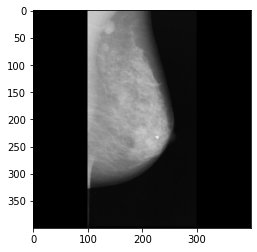

[[3.793955e-10 0.000000e+00 1.000000e+00]]
Normal


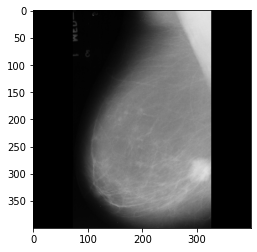

[[1. 0. 0.]]
Begnin


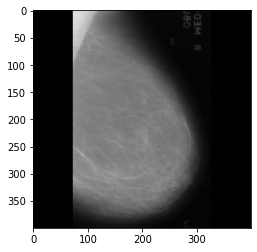

[[0. 0. 1.]]
Normal


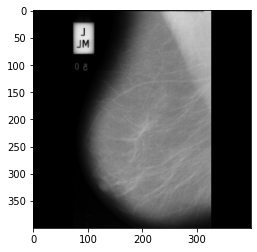

[[1.5580447e-08 0.0000000e+00 1.0000000e+00]]
Normal


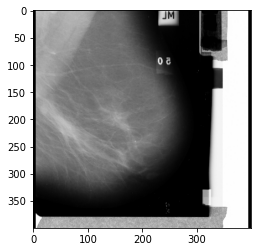

[[1. 0. 0.]]
Begnin


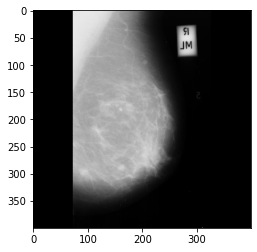

[[0. 0. 1.]]
Normal


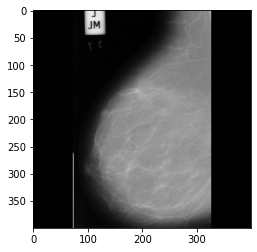

[[2.7202188e-17 0.0000000e+00 1.0000000e+00]]
Normal


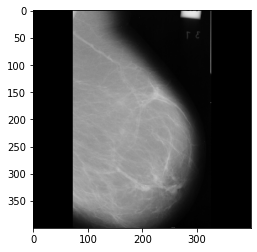

[[0. 0. 1.]]
Normal


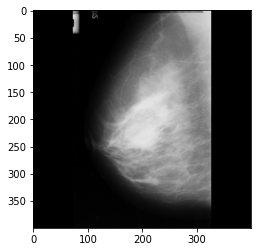

[[1.0000000e+00 0.0000000e+00 9.5260154e-11]]
Begnin


In [27]:
##### Testing Now

dir_path="BreastData/data/testing"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(400,400,3))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0) 
    images=np.vstack([X])

    val=model.predict(images)
    
    print(val)
    #print(np.argmax(val[0]))
    prediction=np.argmax(val[0])
    if prediction==0:
        print("Begnin")
    if prediction==1:
        print("Malignant")
    if prediction==2:
        print("Normal")
    
